<a href="https://colab.research.google.com/github/Karll-L/EEG-DeepLearning/blob/master/CNN_on_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys, os
import pandas as pd
import numpy as np
from numpy import genfromtxt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model

In [ ]:
BASEPATH = './'
sys.path.insert(0, BASEPATH)
os.chdir(BASEPATH)
MODELPATH = './modelfull.h5'
print("Started")
print("Running")
values = []
for y in range(0, 16): 
    print("Fetching Subject "+str(y)+"'s File")
    for x in range(0, 21):
        string = "/content/drive/My Drive/Mags/FFT"+str(y)+"_Signalfull"+str(x)+"_1.csv"
        value = genfromtxt(string, delimiter=',')
        values.append(value.astype('float32').transpose())
        
        string = "/content/drive/My Drive/Mags/FFT"+str(y)+"_Signalfull"+str(x)+"_2.csv"
        value = genfromtxt(string, delimiter=',')
        values.append(value.astype('float32').transpose())


print("All files Fetched")
values = np.asarray(values)
values = np.expand_dims(values, -1)
values = np.expand_dims(values, -1)
print("Numpy array generated")

Started
Running
Fetching Subject 0's File
Fetching Subject 1's File
Fetching Subject 2's File
Fetching Subject 3's File
Fetching Subject 4's File
Fetching Subject 5's File
Fetching Subject 6's File
Fetching Subject 7's File
Fetching Subject 8's File
Fetching Subject 9's File
Fetching Subject 10's File
Fetching Subject 11's File
Fetching Subject 12's File
Fetching Subject 13's File
Fetching Subject 14's File
Fetching Subject 15's File
All files Fetched
Numpy array generated


In [ ]:
print("Generating Result Array")
result = []
for i in range(0,336):
    result.append([0])
    result.append([1])
print("Result Generated")
num_features = 16
num_labels = 2
batch_size = 512
epochs = 50
width, height = 1, 15500
print("Parameters Set")

Generating Result Array
Result Generated
Parameters Set


# **70-30 Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(values, result, test_size=0.3, random_state=42)

model = Sequential()

model.add(Conv2D(num_features, kernel_size=1, activation='relu', input_shape=(height, width, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))

model.add(MaxPooling2D(pool_size=(2, 1), strides=(2, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 1), strides=(2, 1)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
tensorboard = TensorBoard(log_dir='./logs')
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(MODELPATH, monitor='val_loss', verbose=1, save_best_only=True)
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 15500, 1, 16)      32        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7750, 1, 16)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7750, 1, 16)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7750, 1, 32)       4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3875, 1, 32)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3875, 1, 32)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 124000)           

In [ ]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=15,
          verbose=1,
          validation_data=(np.array(X_test), np.array(y_test)),
          shuffle=True,
          callbacks=[lr_reducer,early_stopper, checkpointer])

Epoch 1/15
1/1 [==============================] - ETA: 0s - loss: 0.7179 - accuracy: 0.5383
Epoch 00001: val_loss improved from inf to 2.41457, saving model to ./modelfull.h5
1/1 [==============================] - 2s 2s/step - loss: 0.7179 - accuracy: 0.5383 - val_loss: 2.4146 - val_accuracy: 0.5248 - lr: 0.0050
Epoch 2/15
1/1 [==============================] - ETA: 0s - loss: 2.7166 - accuracy: 0.4872
Epoch 00002: val_loss improved from 2.41457 to 0.86479, saving model to ./modelfull.h5
1/1 [==============================] - 1s 938ms/step - loss: 2.7166 - accuracy: 0.4872 - val_loss: 0.8648 - val_accuracy: 0.4752 - lr: 0.0050
Epoch 3/15
1/1 [==============================] - ETA: 0s - loss: 0.9628 - accuracy: 0.5426
Epoch 00003: val_loss improved from 0.86479 to 0.68331, saving model to ./modelfull.h5
1/1 [==============================] - 1s 884ms/step - loss: 0.9628 - accuracy: 0.5426 - val_loss: 0.6833 - val_accuracy: 0.4851 - lr: 0.0050
Epoch 4/15
1/1 [============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


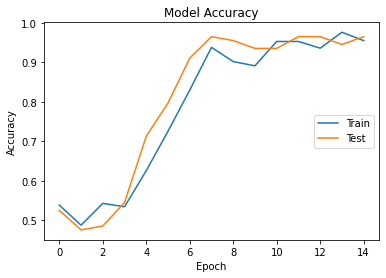

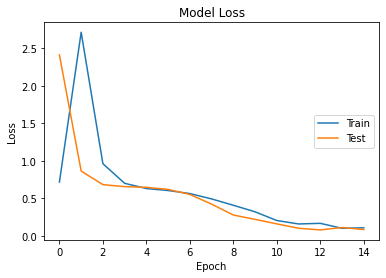

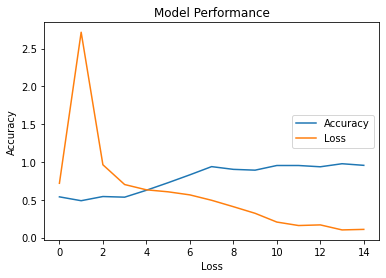

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.legend(['Accuracy', 'Loss'], loc='center right')
plt.show()

#**50-50 Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(values, result, test_size=0.5, random_state=42)

model2 = Sequential()

model2.add(Conv2D(num_features, kernel_size=1, activation='relu', input_shape=(height, width, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))

model2.add(MaxPooling2D(pool_size=(2, 1), strides=(2, 1)))
model2.add(Dropout(0.2))

model2.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 1), strides=(2, 1)))
model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(2*2*num_features, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_features, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
tensorboard = TensorBoard(log_dir='./logs')
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(MODELPATH, monitor='val_loss', verbose=1, save_best_only=True)
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 15500, 1, 16)      32        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7750, 1, 16)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7750, 1, 16)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7750, 1, 32)       4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3875, 1, 32)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 3875, 1, 32)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 124000)           

In [ ]:
history2 = model2.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=15,
          verbose=1,
          validation_data=(np.array(X_test), np.array(y_test)),
          shuffle=True,
          callbacks=[lr_reducer,early_stopper, checkpointer])


Epoch 1/15
1/1 [==============================] - ETA: 0s - loss: 0.3842 - accuracy: 0.8571
Epoch 00001: val_loss improved from 0.48250 to 0.24284, saving model to ./modelfull.h5
1/1 [==============================] - 1s 1s/step - loss: 0.3842 - accuracy: 0.8571 - val_loss: 0.2428 - val_accuracy: 0.9196 - lr: 0.0050
Epoch 2/15
1/1 [==============================] - ETA: 0s - loss: 0.2881 - accuracy: 0.8869
Epoch 00002: val_loss improved from 0.24284 to 0.14959, saving model to ./modelfull.h5
1/1 [==============================] - 1s 1s/step - loss: 0.2881 - accuracy: 0.8869 - val_loss: 0.1496 - val_accuracy: 0.9673 - lr: 0.0050
Epoch 3/15
1/1 [==============================] - ETA: 0s - loss: 0.1917 - accuracy: 0.9435
Epoch 00003: val_loss improved from 0.14959 to 0.10744, saving model to ./modelfull.h5
1/1 [==============================] - 1s 1s/step - loss: 0.1917 - accuracy: 0.9435 - val_loss: 0.1074 - val_accuracy: 0.9702 - lr: 0.0050
Epoch 4/15
1/1 [==============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


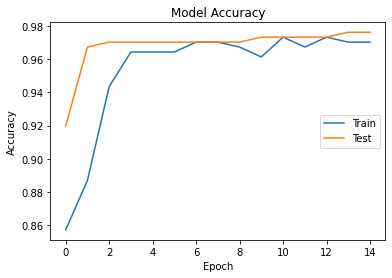

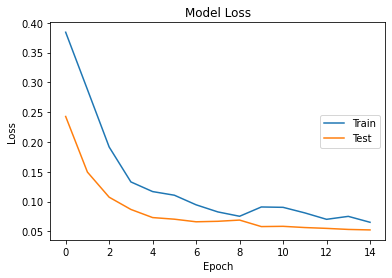

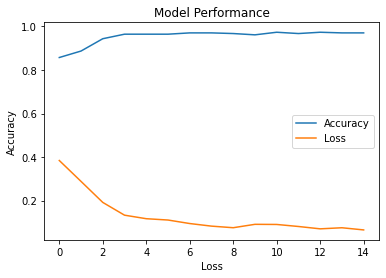

In [ ]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')
plt.show()

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['loss'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.legend(['Accuracy', 'Loss'], loc='center right')
plt.show()

# **Model Plot**

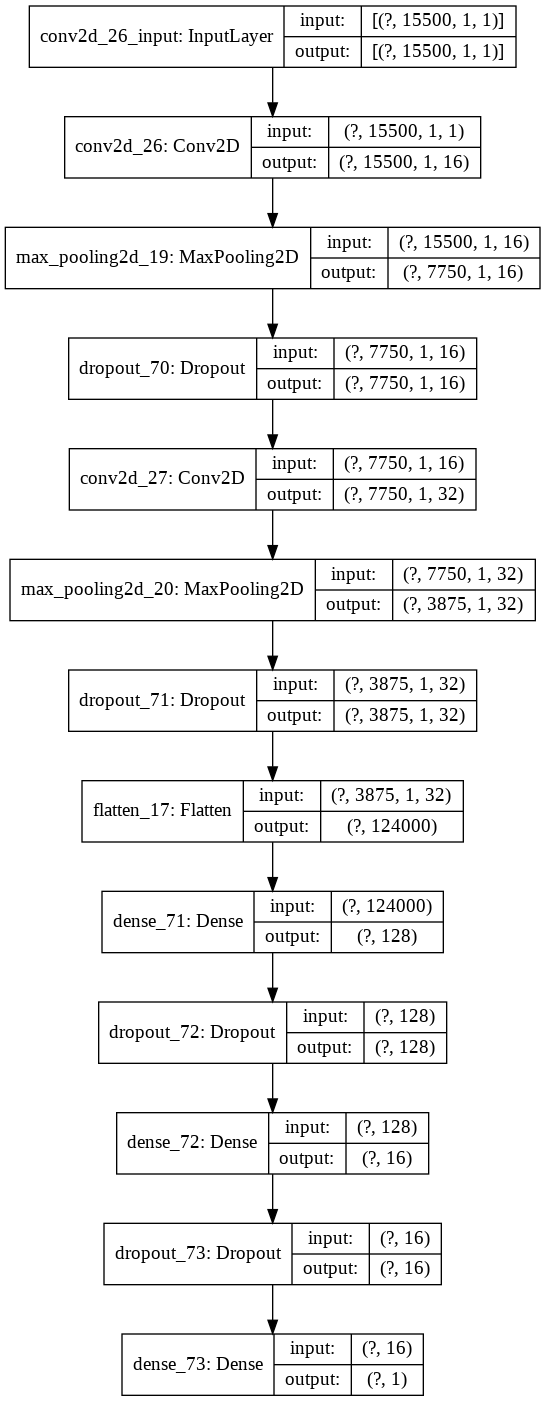

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)